In [18]:
#import required packages
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt



import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
data = data.drop(['id','pickup_datetime','dropoff_datetime'],axis=1)

In [8]:
pd.get_dummies(data, columns=["store_and_fwd_flag"])

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,1,0
...,...,...,...,...,...,...,...,...,...
729317,2,2,-73.965919,40.789780,-73.952637,40.789181,296,1,0
729318,1,1,-73.996666,40.737434,-74.001320,40.731911,315,1,0
729319,1,1,-73.997849,40.761696,-74.001488,40.741207,673,1,0
729320,1,1,-74.006706,40.708244,-74.013550,40.713814,447,1,0


In [10]:
store_fwd = [1 if ele=='Y' else 0 for ele in data['store_and_fwd_flag']]

In [11]:
data['store_and_fwd_flag'] = store_fwd

In [12]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848


In [13]:
data.dtypes

vendor_id               int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int64
trip_duration           int64
dtype: object

### Data Preparation

In [15]:
# creating the independent and dependent variables
X = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']

In [133]:
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [25]:
X_test

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
163528,1,1,-73.956657,40.766899,-73.974190,40.783077,0
476206,1,1,-73.993668,40.741863,-74.008255,40.748798,0
128038,1,1,-73.977524,40.764492,-73.987450,40.762882,0
417542,1,1,-73.988510,40.759403,-73.978951,40.756332,0
94289,2,1,-73.998505,40.750465,-74.004745,40.741901,0
...,...,...,...,...,...,...,...
269141,2,2,-73.976685,40.787899,-73.972145,40.793831,0
148772,1,1,-73.968597,40.761684,-73.996475,40.747829,0
137688,2,1,-73.973221,40.748390,-73.870827,40.773949,0
147446,2,1,-73.862907,40.769444,-73.952095,40.813904,0


In [63]:
from sklearn.metrics import mean_squared_error
import math

In [64]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 3974.6345335997357


### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier as KNN


In [82]:
rmse_val = [] #to store rmse values for different k
for K in [3,5,7,9]:
    #K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_train) #make prediction on test set
    error = sqrt(mean_squared_error(y_train,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  3 is: 3466.2675291983824
RMSE value for k=  5 is: 3643.871753390968
RMSE value for k=  7 is: 3746.5530589815226
RMSE value for k=  9 is: 3782.759310567676


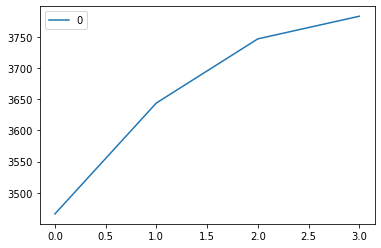

In [83]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

### From the above plot we can observe that the elbow is at K=5 and the RMSE value is 3643.871 so this is the best value of K for the given Dataset.

In [135]:
knn_model =  neighbors.KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)

## Building a Linear Model with Regularization

In [136]:
## Here i had chosen ElasticNet Regularization technique as it solves the limitations of both Lasso & Ridge Regression.
from sklearn.linear_model import ElasticNet 
from sklearn.datasets import make_regression

In [137]:
lr_reg = ElasticNet()

lr_reg.fit(X, y)

lr_reg_pred = lr_reg.predict(X_test)

In [86]:
# here are the coefficients
lr.coef_

array([64.75245867, 24.02874026, 17.82674082, -8.88705409,  9.88303731,
       -6.87099718,  1.04654671])

In [87]:
# the intercept
lr.intercept_

3504.8148457242096

## Building Random Forest Model

In [138]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [139]:
rf_pred = regressor.predict(X_test)


## Gradient Boosting Model

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)



GradientBoostingRegressor()

In [142]:
gb_pred = gb.predict(X_test)
gb_pred

array([ 593.3892929 ,  580.52615618,  629.46804833, ..., 1811.61611148,
       1757.83509138,  986.4006482 ])

### Ensemble by averaging models

In [144]:
average_all_models = np.mean([rf_pred,gb_pred,lr_reg_pred,knn_pred], axis=0)

In [145]:
average_all_models

array([ 644.9428626 ,  618.14247487,  614.80183242, ..., 1147.52605219,
       1382.6062265 ,  979.6842201 ])

In [147]:
len(average_all_models)

145865

In [148]:
len(y_test)

145865

In [149]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [152]:
math.sqrt(mean_squared_error(y_test,average_all_models))

3146.464656619418

In [151]:
mean_absolute_percentage_error(y_test,average_all_models)

0.9654946675218938

### The result for the ensemble model by averaging 4 models is RMSE: 3146 and MAPE: 96%